# Normalization and Whitening

Most machine learning algorithms only perform well on data that has been properly prepaired. In practice it is almost always preferable to scale our input data and shift the mean to zero before passing it to our model. We then both train and deploy our model using scaled input. So long as you apply the same normalization techniques to your test and production data that you did to the training data, the performance of your algorithm should greatly improve.


In [1]:
import csv

data = []
with open('../../data/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # some of the data has bad lines, ignore
        if len(row) == 6 or len(row) == 7:
            try:
                z = float(row[5].replace(';', ''))
            except:
                continue
            # create a create a matrix with x, y, and z, accelerometer data
            data.append((float(row[3]), float(row[4]), z))

## Un-normalized (Raw Data)

x mean: 0.66    x std dev:6.85
y mean: 7.26    y std dev:6.75
z mean: 0.41    z std dev:4.75


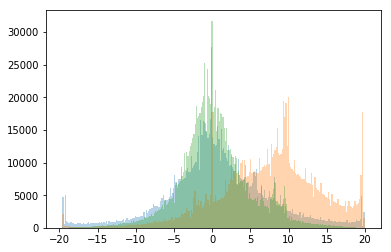

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = [d[0] for d in data]
y = [d[1] for d in data]
z = [d[2] for d in data]

print('x mean: {:.2f}    x std dev:{:.2f}'.format(np.mean(x), np.std(x)))
print('y mean: {:.2f}    y std dev:{:.2f}'.format(np.mean(y), np.std(y)))
print('z mean: {:.2f}    z std dev:{:.2f}'.format(np.mean(z), np.std(z)))

plt.hist(x, bins=250, alpha=0.33)
plt.hist(y, bins=250, alpha=0.33)
plt.hist(z, bins=250, alpha=0.33)

plt.show()

## Zero-Mean and Unit Variance

x mean: 0.00    x std dev:1.00
y mean: -0.00    y std dev:1.00
z mean: 0.00    z std dev:1.00


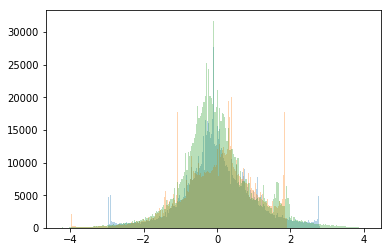

In [3]:
from sklearn import preprocessing

x2 = preprocessing.scale(x)
y2 = preprocessing.scale(y)
z2 = preprocessing.scale(z)

print('x mean: {:.2f}    x std dev:{:.2f}'.format(np.mean(x2), np.std(x2)))
print('y mean: {:.2f}    y std dev:{:.2f}'.format(np.mean(y2), np.std(y2)))
print('z mean: {:.2f}    z std dev:{:.2f}'.format(np.mean(z2), np.std(z2)))

plt.hist(x2, bins=250, alpha=0.33)
plt.hist(y2, bins=250, alpha=0.33)
plt.hist(z2, bins=250, alpha=0.33)

plt.show()

## Feature-Wise Min-Max Scaler

/home/bbpwn2/Documents/Branger_Briz/machine-learning-docs/code/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/bbpwn2/Documents/Branger_Briz/machine-learning-docs/code/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/bbpwn2/Documents/Branger_Briz/machine-learning-docs/code/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: Dep

x mean: 0.51    x std dev:0.17
y mean: 0.68    y std dev:0.17
z mean: 0.51    z std dev:0.12


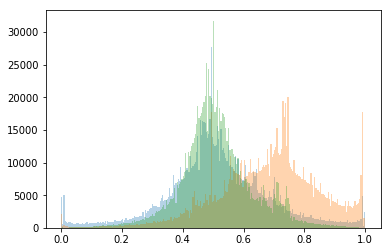

In [4]:
x3 = preprocessing.MinMaxScaler().fit_transform(x)
y3 = preprocessing.MinMaxScaler().fit_transform(y)
z3 = preprocessing.MinMaxScaler().fit_transform(z)

print('x mean: {:.2f}    x std dev:{:.2f}'.format(np.mean(x3), np.std(x3)))
print('y mean: {:.2f}    y std dev:{:.2f}'.format(np.mean(y3), np.std(y3)))
print('z mean: {:.2f}    z std dev:{:.2f}'.format(np.mean(z3), np.std(z3)))

plt.hist(x3, bins=250, alpha=0.33)
plt.hist(y3, bins=250, alpha=0.33)
plt.hist(z3, bins=250, alpha=0.33)

plt.show()